Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


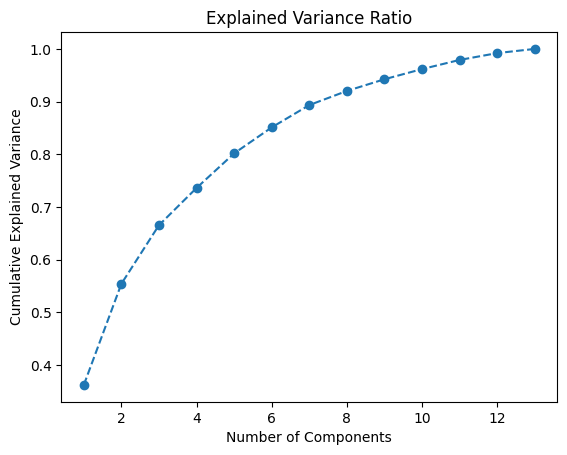

Original shape: (178, 13)
Reduced shape: (178, 12)


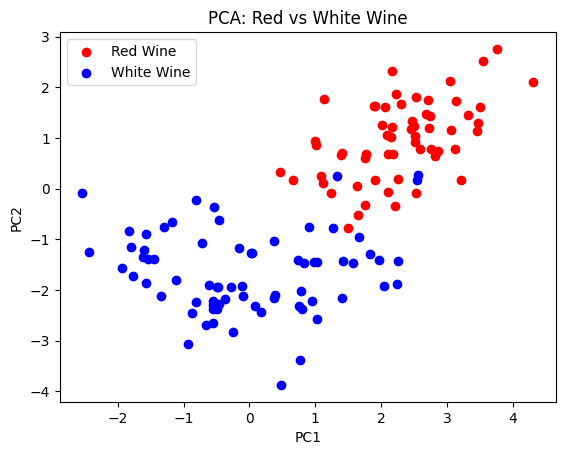

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and check data
df = pd.read_csv('Wine.csv')
print(df.isnull().sum())

# Features and target
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA for explained variance
pca = PCA().fit(X_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Reduce to 12 components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# Visualization (first 2 components)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='red', label='Red Wine')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], c='blue', label='White Wine')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Red vs White Wine')
plt.legend()
plt.show()
